# DATA PRE TREATMENT

Let's start by importing all our **Libraries**

In [1]:
# IMPORT
## Actually used
import sys
import os
import pandas as pd
from nltk.stem import WordNetLemmatizer
import re
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image  
from sklearn import tree
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt

## Actually not used 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from mpl_toolkits import mplot3d
from itertools import combinations
from itertools import chain
%matplotlib inline

## Importing the Dataset

In [2]:
# PATHS
DATA_PATH = os.path.join("./data")
DATA_NAME_CSV = "CyberTroll.csv"

Extraction of our data and transformation into DataFrame with **pandas**

In [3]:
#Transforming the .csv file into a DataFrame
def load_data(data_path=DATA_PATH,data_name_csv=DATA_NAME_CSV):
        # Path to file .csv
        csv_path = os.path.join(data_path,data_name_csv)
        # Object DATA_FRAME
        return pd.read_csv(csv_path)

# execution
data_frame = load_data()

Let's look at what this data looks like

In [4]:
data_frame.head()

,content,annotation/notes,annotation/label/0,extras,metadata/first_done_at,metadata/last_updated_at,metadata/sec_taken,metadata/last_updated_by,metadata/status,metadata/evaluation
0,Get fucking real dude.,NaN,1,NaN,1527503426000,1527503426000,0,jI67aE5hwwdh6l16bcfFVnpyREd2,done,NONE
1,She is as dirty as they come and that crook R...,NaN,1,NaN,1527503426000,1527503426000,0,jI67aE5hwwdh6l16bcfFVnpyREd2,done,NONE
2,why did you fuck it up. I could do it all day ...,NaN,1,NaN,1527503426000,1527503426000,0,jI67aE5hwwdh6l16bcfFVnpyREd2,done,NONE
3,Dude they dont finish enclosing the fucking sh...,NaN,1,NaN,1527503426000,1527503426000,0,jI67aE5hwwdh6l16bcfFVnpyREd2,done,NONE
4,WTF are you talking about Men? No men thats no...,NaN,1,NaN,1527503426000,1527503426000,0,jI67aE5hwwdh6l16bcfFVnpyREd2,done,NONE


Quick check of the quantity of samples and the diversity of cases

In [5]:
data_frame.describe() 

,annotation/notes,annotation/label/0,extras,metadata/first_done_at,metadata/last_updated_at,metadata/sec_taken
count,0.0,20001.000000,0.0,2.000100e+04,2.000100e+04,20001.0
mean,NaN,0.391080,NaN,1.527503e+12,1.527503e+12,0.0
std,NaN,0.488005,NaN,2.717817e+04,2.717817e+04,0.0
min,NaN,0.000000,NaN,1.527503e+12,1.527503e+12,0.0
25%,NaN,0.000000,NaN,1.527503e+12,1.527503e+12,0.0
50%,NaN,0.000000,NaN,1.527503e+12,1.527503e+12,0.0
75%,NaN,1.000000,NaN,1.527503e+12,1.527503e+12,0.0
max,NaN,1.000000,NaN,1.527504e+12,1.527504e+12,0.0


Check if there is a null value and all the indexes we have

In [6]:
data_frame.isnull().sum()

content                         0
annotation/notes            20001
annotation/label/0              0
extras                      20001
metadata/first_done_at          0
metadata/last_updated_at        0
metadata/sec_taken              0
metadata/last_updated_by        0
metadata/status                 0
metadata/evaluation             0
dtype: int64

**annotation/notes**,**extras** is composed of null values so its implication in a classification algorithm is not relevant.

In [7]:
data_frame = data_frame.drop(['annotation/notes','extras'],axis=1)

Let's look at all the unique choices we have in all indexes, if there is an index that always has the same value we can remove it.

In [8]:
for index in data_frame.columns:
        print(str(index) + " : " + str(data_frame[index].unique()))

content : ['Get fucking real dude.'
 "She is as dirty as they come  and that crook Rengel  the Dems are so fucking corrupt it's a joke. Make Republicans look like  ..."
 "why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here."
 ... 'hahahahaha >:) im evil mwahahahahahahahahaha'
 'What&;s something unique about Ohio? :)'
 'Who is the biggest gossiper you know?']
annotation/label/0 : [1 0]
metadata/first_done_at : [1527503426000 1527503427000 1527503428000 1527503429000 1527503430000
 1527503431000 1527503432000 1527503433000 1527503434000 1527503435000
 1527503436000 1527503437000 1527503438000 1527503439000 1527503440000
 1527503441000 1527503442000 1527503443000 1527503444000 1527503445000
 1527503446000 1527503447000 1527503448000 1527503449000 1527503450000
 1527503451000 1527503452000 1527503453000 1527503454000 1527503455000
 1527503456000 1527503457000 1527503458000 1527503459000 1527503460000
 15275034610

**metadata/sec_taken**,**metadata/last_updated_by**,**metadata/status**,**metadata/evaluation** is composed of a single variable so its implication in a classification algorithm is not relevant.

In [9]:
data_frame = data_frame.drop(['metadata/sec_taken','metadata/last_updated_by','metadata/status','metadata/evaluation'],axis=1)

**metadata/last_updated_at**,**metadata/first_done_at** is composed of timestamp so it's implication in not relevant.

In [10]:
data_frame = data_frame.drop(['metadata/last_updated_at','metadata/first_done_at'],axis=1)

In [11]:
data_frame.head()

,content,annotation/label/0
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook R...,1
2,why did you fuck it up. I could do it all day ...,1
3,Dude they dont finish enclosing the fucking sh...,1
4,WTF are you talking about Men? No men thats no...,1


Rename columns for easier use:

In [12]:
data_frame = data_frame.rename(columns={"content" : "sentence","annotation/label/0" :"label"})

## Text Preprocessing

Text may contain numbers, special characters, and unwanted spaces. We will remove all the special characters, numbers, and unwanted spaces from our text.

In [13]:
# Lemmatizer 
stemmer = WordNetLemmatizer()
# Function to apply on our sentence
def converterSentence(text):
    # Remove all the special characters
    text = re.sub(r'\W', ' ', text)
    # remove all single characters
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Converting to Lowercase
    text = text.lower()
    # Lemmatization
    text = text.split()
    text = [stemmer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

In [14]:
data_frame['sentence']= data_frame.sentence.apply(converterSentence)
data_frame.sentence

0                                    get fucking real dude
1        she is a dirty a they come and that crook reng...
2        why did you fuck it up could do it all day too...
3        dude they dont finish enclosing the fucking sh...
4        wtf are you talking about men no men thats not...
5        ill save you the trouble sister here come big ...
6        im dead serious real athlete never cheat don e...
7        go absolutely insane hate to be the bearer of ...
8        lmao im watching the same thing ahaha the gay ...
9        lol no he said what do you call jail cell to g...
10       truth on both count that guy is an as and thei...
11                                        shakespeare nerd
12                               you are such fucking dork
13                                       heh fuck em where
14                         damn it totally forgot that one
15                    wow damn would have been pissed that
16               nigga geigh lmao fuck yo final beeeeeit

# Analysing Data

Different approaches exist to convert text into the corresponding numerical form. But we are going to use Bag of Words Model because it is the most efficient.

**Default Vectorizer & Default model to have a first overview of the result** :

In [15]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data_frame.sentence)
Y = data_frame.label

The bag of words approach works fine for converting text to numbers. However, it has one drawback. It assigns a score to a word based on its occurrence in a particular document. It doesn't take into account the fact that the word might also be having a high frequency of occurrence in other documents as well. TFIDF resolves this issue by multiplying the term frequency of a word by the inverse document frequency. 

In [16]:
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X)

Attempt to find parameters for the vectorizer which could impact the model. But the sentences being too small the min_df and max_df parameters are useless here. We still just tried to vary the number of features but that did not affect the accuracy.

In [17]:
LIST_MIN_DEF= [x/100 for x in range(1,50,5)]
LIST_MAX_DEF= [x for x in range(90,100)]
LIST_MAX_DEF.reverse()
LIST_MAX_FEATURES = [x for x in range(100,2000,50)]
def customVectorizer(listMinDef=LIST_MIN_DEF,listMaxDef=LIST_MAX_DEF,listMaxFeatures=LIST_MAX_FEATURES):
    listVectorizer = []
    for maxFeatures in listMaxFeatures:
        listVectorizer.append(CountVectorizer(stop_words='english',max_features=maxFeatures))  
    return listVectorizer


You can find the result of this function in a file located in the data folder, just for information there is just marked the same for each variation.

In [18]:
# Vary vectorizer parameters to see if it impacts the default Random Forest model
def ImpactOfVectorizer():
    fichier = open("data/dataRFCDefaultCustomVectorizer.txt", "a")
    for vecto in customVectorizer():
        vectorizer = vecto
        X = vectorizer.fit_transform(data_frame.sentence)
        Y = data_frame.label
        tfidfconverter = TfidfTransformer()
        X = tfidfconverter.fit_transform(X)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
        # Simple Random Forest Classifier
        classifier = RandomForestClassifier(n_estimators=10, random_state=0)
        classifier.fit(x_train, y_train) 
        crboost = classification_report(y_test,y_pred,digits=10,output_dict=True)
        fichier.write(str(crboost['0']['precision'])+" " +str(crboost['1']['precision'])+"\n")
    fichier.close()
# The famous line that saves you 5 s               
# ImpactOfVectorizer()

Result :
<br/> 0.9555843035791289 0.8733650416171225
<br/> 0.9555843035791289 0.8733650416171225
<br/> 0.9555843035791289 0.8733650416171225
<br/> 0.9555843035791289 0.8733650416171225
<br/> ...

"The answer to the question “What machine learning model should I use?” is always “It depends.” Even the most experienced data scientists can’t tell which algorithm will perform best before experimenting them."

In order to find the optimum model, we tried to make as many models as possible to know which would be the best. Here are the 6 models that were made.

MLPClassifier, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, LogisticRegression and finally SVM (Support Vector Machine).

We will use these trains and tests for all our models.

In [19]:
# Vectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data_frame.sentence)
Y = data_frame.label
# TFID
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X)
# SPLIT
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## MLPClassifier

This model aims to optimize the log-loss function using LBGFGS or stochastic gradient descent.

We will start with the default neural network (45 min)

In [35]:
modelMLP = MLPClassifier()
modelMLP.fit(x_train,y_train)

c:\users\singl\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Using the trained network to predict

In [36]:
y_pred = modelMLP.predict(x_test)
modelMLP.score(x_test, y_pred)

1.0

In [37]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[2911,  751],
       [ 183, 2156]], dtype=int64)

In [38]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      3662
           1       0.74      0.92      0.82      2339

    accuracy                           0.84      6001
   macro avg       0.84      0.86      0.84      6001
weighted avg       0.86      0.84      0.85      6001



We will now try to find more optimal parameters, with the magic GridSearchCV multi-threads.

In [ ]:
modelMLP = MLPClassifier()
parameter_space = {'activation': ['logistic','tanh', 'relu'],
                  'hidden_layer_sizes':[i for i in range(1,220,20)],
                  'alpha':[0.0001,0.001,0.01,0.1,1],
                  'max_iter':[50, 100, 150, 200]}
gridSearch = GridSearchCV(modelMLP, parameter_space, n_jobs=-1, cv=3)
gridSearch.fit(x_train,y_train)

Let's the best results:

In [ ]:
# Best parameters set
print('Best parameters found:\n', gridSearch.best_params_)

In [ ]:
# All results
means = gridSearch.cv_results_['mean_test_score']
stds = gridSearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridSearch.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In order to improve the performances of this classifier, we will look at how accuracy evolves when we change the size of the test set, the number of hidden layer of the classifier or the number of iterations.

In [ ]:
#First, the function to change the size of the test set.
def calculate_test_size(X, y, o):
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=o)
	scaler = StandardScaler()
	scaler.fit(X_train)

	scaler.transform(X_train)
	scaler.transform(X_test)
	mlp= MLPClassifier(hidden_layer_sizes=(3, 13), max_iter=500)
	mlp.fit(X_train, y_train.ravel())
	predictions = mlp.predict(X_test)

	return accuracy_score(y_test, predictions)

#Next, the function to change the number of the hidden layer.
def calculate_hidden(X, y, o):
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
	scaler = StandardScaler()
	scaler.fit(X_train)

	scaler.transform(X_train)
	scaler.transform(X_test)
	mlp= MLPClassifier(hidden_layer_sizes=(3, o), max_iter=500)
	mlp.fit(X_train, y_train.ravel())
	predictions = m
    lp.predict(X_test)

	return accuracy_score(y_test, predictions)

#Finally, the function to change the number of iteration.
def calculate_it(X, y, o):
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
	scaler = StandardScaler()
	scaler.fit(X_train)

	scaler.transform(X_train)
	scaler.transform(X_test)
	mlp= MLPClassifier(hidden_layer_sizes=(3, 13), max_iter=o)
	mlp.fit(X_train, y_train.ravel())
	predictions = mlp.predict(X_test)

	return accuracy_score(y_test, predictions)

test_size = np.arange(0.1, 1, .1)
size_o_test = [calculate_test_size(X, Y, i) for i in test_size]

hidden_test = np.arange(5, 50, 5)
hidd_of_test = [calculate_hidden(X, Y, i) for i in hidden_test]

it_test = np.arange(100, 1000, 50)
it_of_test = [calculate_it(X, Y, i) for i in it_test]

In the purpose to visualize its results, we are now going to display them in a plot.

In [ ]:
plt.plot(test_size, size_o_test)
plt.title("Experimentation on test size")
plt.xlabel("Size of test set")
plt.ylabel("Accuracy")
plt.show()

plt.plot(hidden_test, hidd_of_test)
plt.title("Experimentation on number of hidden layers")
plt.xlabel("Number of hidden layer")
plt.ylabel("Accuracy")
plt.show()

plt.plot(it_test, it_of_test)
plt.title("Experimentation on number of iteration")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.show()

## LogisticRegression

This classification is used in statistics to model the probability of a certain class.

We will start with the default one.

In [25]:
modelLR = LogisticRegression()
modelLR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_pred = modelLR.predict(x_test)
modelLR.score(x_test, y_pred)

1.0

In [27]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[3204,  458],
       [ 982, 1357]], dtype=int64)

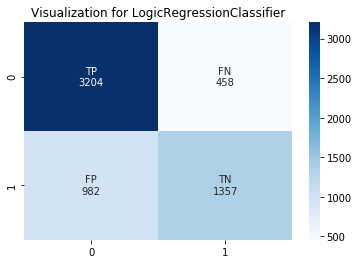

In [37]:
text = np.asarray([['TP', 'FN'], ['FP', 'TN']])
labels = (np.asarray(["{}\n{}".format(text,conf_matrix) for text, conf_matrix in zip(text.flatten(), conf_matrix.flatten())])).reshape(2,2)
sns.heatmap(conf_matrix, cmap="Blues", annot=labels, fmt='')
plt.title("Visualization for LogicRegressionClassifier")
plt.show()

In [28]:
cr = classification_report(y_test,y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.77      0.87      0.82      3662
          1       0.75      0.58      0.65      2339

avg / total       0.76      0.76      0.75      6001



We will now try to add hyperparameter to get a better accuracy.

For this one, 5 hyperparameters : C, penality, max_iter,solver and tol.(5-10 min)

In [102]:
modelLR = LogisticRegression()
parameter_space = {'penalty': ['l1','l2'],
                  'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  'max_iter':[50, 100, 150, 200],
                  'tol':[0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10],
                  'solver' : ['liblinear']}
gridSearchLR = GridSearchCV(modelLR, parameter_space, n_jobs=-1, cv=3)
gridSearchLR.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 150, 200],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear'],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,


Let's see the best results:

In [103]:
# Best parameter set
print('Best parameters found:\n', gridSearchLR.best_params_)

Best parameters found:
 {'C': 10, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}


In [104]:
# All results
means = gridSearchLR.cv_results_['mean_test_score']
stds = gridSearchLR.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridSearchLR.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.608 (+/-0.000) for {'C': 0.0001, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}
0.608 (+/-0.000) for {'C': 0.0001, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
0.608 (+/-0.000) for {'C': 0.0001, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
0.608 (+/-0.000) for {'C': 0.0001, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
0.608 (+/-0.000) for {'C': 0.0001, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1}
0.608 (+/-0.000) for {'C': 0.0001, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1}
0.608 (+/-0.000) for {'C': 0.0001, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 10}
0.608 (+/-0.000) for {'C': 0.0001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}
0.608 (+/-0.000) for {'C': 0.0001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
0.608 (+/-0.000) for {'C': 0.0001, 'max_iter': 50, 'penalty': '

Let's take a closer look at the results of the best parameters

In [19]:
modelLR = LogisticRegression(C=10,max_iter=100,penalty='l1',tol=1e-05,solver='liblinear')
modelLR.fit(x_train,y_train)
y_pred = modelLR.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[3166,  496],
       [ 306, 2033]], dtype=int64)

In [20]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      3662
           1       0.80      0.87      0.84      2339

    accuracy                           0.87      6001
   macro avg       0.86      0.87      0.86      6001
weighted avg       0.87      0.87      0.87      6001



We will now calculate the average performance of our model with the best hyperparameters.

In [21]:
# Calcul real efficient of the model
def functionRealPerf(numberRun):
    listPrecision= []
    for i in range(numberRun):
        modelLR = LogisticRegression(C=10,max_iter=100,penalty='l1',tol=1e-05,solver='liblinear')
        modelLR.fit(x_train,y_train)
        y_pred = modelLR.predict(x_test)
        cr = classification_report(y_test,y_pred,digits=10,output_dict=True)
        listPrecision.append((cr['0']['precision']+cr['1']['precision'])/2)
    print("Max Precision : " + str(max(listPrecision)))
    print("Avg Precision : " + str(sum(listPrecision)/numberRun))
functionRealPerf(20)

Max Precision : 0.8576991401368539
Avg Precision : 0.8576991401368537


Test de LogisticRegressionCV

In [36]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(x_train, y_train)
y_pred =clf.predict(x_test)

In [37]:
clf.score(x_train, y_train)

0.966

In [38]:
clf = classification_report(y_test,y_pred)
print(clf)

             precision    recall  f1-score   support

          0       0.91      0.85      0.88      3662
          1       0.79      0.87      0.83      2339

avg / total       0.86      0.86      0.86      6001



Plot to see the impact of variations of hyperparameters on the accuracy of the model.

In [105]:
# Convert to plot
penalty_convert =[]
for i in gridSearchLR.cv_results_['params']:
    if(i['penalty'] == 'l1'):
        penalty_convert.append(1)
    if(i['penalty'] == 'l2'):
        penalty_convert.append(2)
        
solver_convert =[]
for i in gridSearchLR.cv_results_['params']:
    if(i['solver'] == 'liblinear'):
        solver_convert.append(1)    
        
C_convert = [ x['C'] for x in gridSearchLR.cv_results_['params']]
max_iter_convert = [ x['max_iter'] for x in gridSearchLR.cv_results_['params']]
tol_convert = [ x['tol'] for x in gridSearchLR.cv_results_['params']]

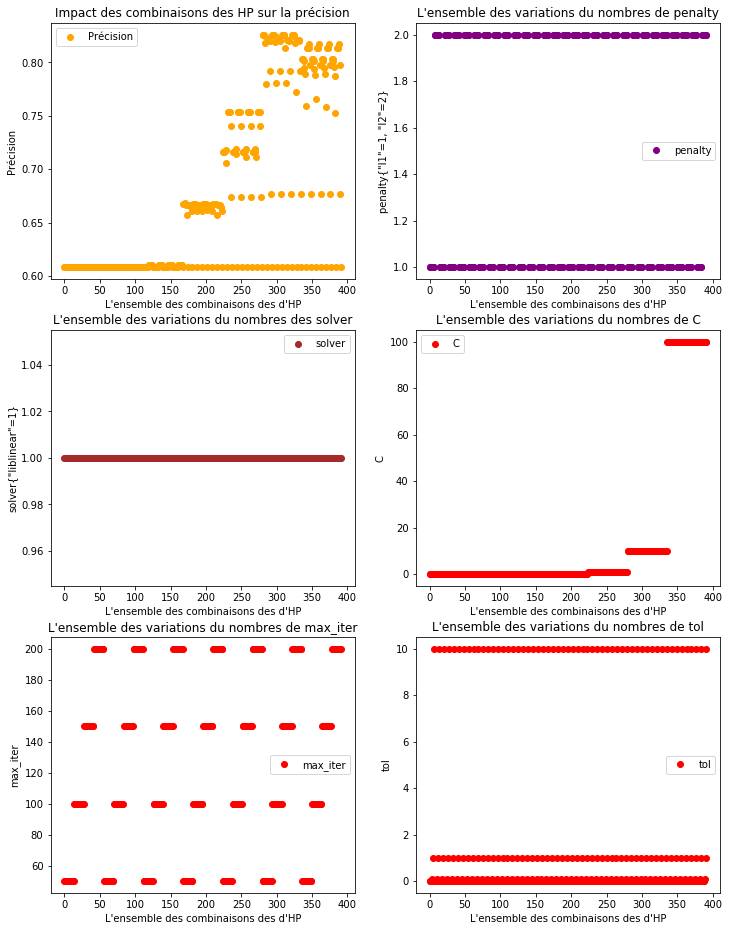

In [106]:
### Plot
y = [ i for i in range(0,len(means))]
fig, (axs) = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))
# Précision 
axs[0,0].plot(y,means,"o",color="orange",label="Précision")
axs[0,0].legend()
axs[0,0].set_title('Impact des combinaisons des HP sur la précision')
axs[0,0].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='Précision')
# penalty
axs[0,1].plot(y,penalty_convert,"o",color="purple",label="penalty")
axs[0,1].set_title('L\'ensemble des variations du nombres de penalty')
axs[0,1].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='penalty{"l1"=1, "l2"=2}')
axs[0,1].legend()
# solver
axs[1,0].plot(y,solver_convert ,"o",color="brown",label="solver")
axs[1,0].set_title('L\'ensemble des variations du nombres des solver')
axs[1,0].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='solver{"liblinear"=1}')
axs[1,0].legend()
# C
axs[1,1].plot(y,C_convert,"o",color="red",label="C")
axs[1,1].set_title('L\'ensemble des variations du nombres de C')
axs[1,1].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='C')
axs[1,1].legend()
# max_iter
axs[2,0].plot(y,max_iter_convert ,"o",color="red",label="max_iter")
axs[2,0].set_title('L\'ensemble des variations du nombres de max_iter')
axs[2,0].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='max_iter')
axs[2,0].legend()
# tol
axs[2,1].plot(y,tol_convert ,"o",color="red",label="tol")
axs[2,1].set_title('L\'ensemble des variations du nombres de tol')
axs[2,1].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='tol')
axs[2,1].legend()
plt.savefig('data/PlotLogisticRegression.png')
plt.show()

## KneighborsClassifier

This classifier uses the k-nearest neighbors method.

Here we go for execution by default.(25min-10h)

In [44]:
modelKNC = KNeighborsClassifier()
modelKNC.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
y_pred = modelKNC.predict(x_test)
modelKNC.score(x_test, y_pred)

MemoryError: 

In [38]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[3114,  548],
       [ 370, 1969]], dtype=int64)

In [39]:
cr = classification_report(y_test,y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.89      0.85      0.87      3662
          1       0.78      0.84      0.81      2339

avg / total       0.85      0.85      0.85      6001



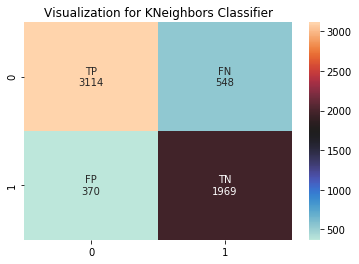

In [42]:
text = np.asarray([['TP', 'FN'], ['FP', 'TN']])
labels = (np.asarray(["{}\n{}".format(text,conf_matrix) for text, conf_matrix in zip(text.flatten(), conf_matrix.flatten())])).reshape(2,2)
sns.heatmap(conf_matrix, cmap="icefire", annot=labels, fmt='')
plt.title("Visualization for KNeighbors Classifier")
plt.show()

Once again it's time to do magic and find the best hyperparameters. We will try to vary the algorithm parameter, n_neighbors and weights.

In [86]:
modelKN = KNeighborsClassifier()
parameter_space = {'algorithm': ['ball_tree','auto', 'kd_tree', 'brute'],
                  'n_neighbors':[i for i in range(30,100,10)],
                  'weights':['distance','uniform']}
gridSearchKN = GridSearchCV(modelKN, parameter_space, n_jobs=-1, cv=3)
gridSearchKN.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'auto', 'kd_tree', 'brute'],
                         'n_neighbors': [30, 40, 50, 60, 70, 80, 90],
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Let's see the best result:

In [87]:
# Best parameter set
print('Best parameters found:\n', gridSearchKN.best_params_)

Best parameters found:
 {'algorithm': 'ball_tree', 'n_neighbors': 90, 'weights': 'distance'}


In [88]:
# All results
means = gridSearchKN.cv_results_['mean_test_score']
stds = gridSearchKN.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridSearchKN.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.874 (+/-0.007) for {'algorithm': 'ball_tree', 'n_neighbors': 30, 'weights': 'distance'}
0.624 (+/-0.005) for {'algorithm': 'ball_tree', 'n_neighbors': 30, 'weights': 'uniform'}
0.874 (+/-0.006) for {'algorithm': 'ball_tree', 'n_neighbors': 40, 'weights': 'distance'}
0.623 (+/-0.006) for {'algorithm': 'ball_tree', 'n_neighbors': 40, 'weights': 'uniform'}
0.874 (+/-0.006) for {'algorithm': 'ball_tree', 'n_neighbors': 50, 'weights': 'distance'}
0.621 (+/-0.005) for {'algorithm': 'ball_tree', 'n_neighbors': 50, 'weights': 'uniform'}
0.874 (+/-0.006) for {'algorithm': 'ball_tree', 'n_neighbors': 60, 'weights': 'distance'}
0.621 (+/-0.005) for {'algorithm': 'ball_tree', 'n_neighbors': 60, 'weights': 'uniform'}
0.874 (+/-0.006) for {'algorithm': 'ball_tree', 'n_neighbors': 70, 'weights': 'distance'}
0.621 (+/-0.004) for {'algorithm': 'ball_tree', 'n_neighbors': 70, 'weights': 'uniform'}
0.874 (+/-0.007) for {'algorithm': 'ball_tree', 'n_neighbors': 80, 'weights': 'distance'}
0.619 (+/-0.006

Let's take a closer look at the results of the best parameters

In [29]:
modelKN = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors=90, weights = 'distance')
modelKN.fit(x_train,y_train)
y_pred = modelKN.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[3621,   41],
       [ 303, 2036]], dtype=int64)

We will now calculate the average performance of our model with the best hyperparameters.

In [31]:
# Calcul real efficient of the model
def functionRealPerf(numberRun):
    listPrecision= []
    for i in range(numberRun):
        modelKN = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors=90, weights = 'distance')
        modelKN.fit(x_train, y_train)
        y_pred = modelKN.predict(x_test)
        cr = classification_report(y_test,y_pred,digits=10,output_dict=True)
        listPrecision.append((cr['0']['precision']+cr['1']['precision'])/2)
    print("Max Precision : " + str(max(listPrecision)))
    print("Avg Precision : " + str(sum(listPrecision)/numberRun))
warnings.filterwarnings('ignore')
functionRealPerf(20)

Max Precision : 0.951521432494232
Avg Precision : 0.951521432494232


Plot to see the impact of variations of hyperparameters on the accuracy of the model.

In [90]:
# Convert to plot
algorithm_convert =[]
for i in gridSearchKN.cv_results_['params']:
    if(i['algorithm'] == 'ball_tree'):
        algorithm_convert.append(1)
    if(i['algorithm'] == 'auto'):
        algorithm_convert.append(2)
    if(i['algorithm'] == 'kd_tree'):
        algorithm_convert.append(3)
    if(i['algorithm'] == 'brute'):
        algorithm_convert.append(4)
        
weights_convert =[]
for i in gridSearchKN.cv_results_['params']:
    if(i['weights'] == 'distance'):
        weights_convert.append(1)
    if(i['weights'] == 'uniform'):
        weights_convert.append(2)     
        
n_neighbors_convert = [ x['n_neighbors'] for x in gridSearchKN.cv_results_['params']]

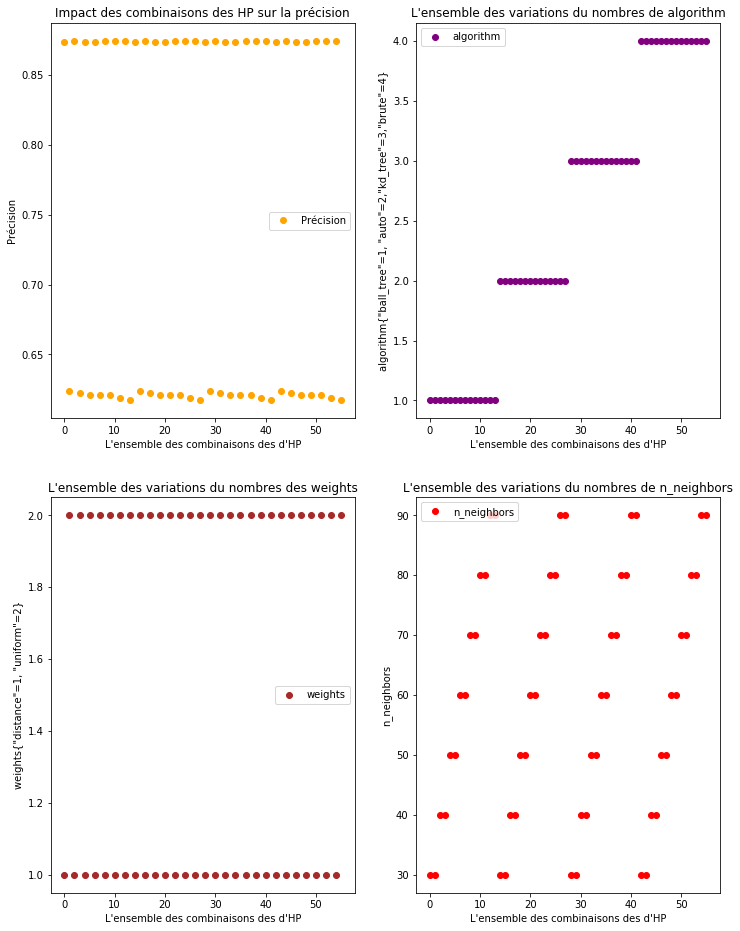

In [92]:
### Plot
y = [ i for i in range(0,len(means))]
fig, (axs) = plt.subplots(nrows=2, ncols=2, figsize=(12, 16))
# Précision 
axs[0,0].plot(y,means,"o",color="orange",label="Précision")
axs[0,0].legend()
axs[0,0].set_title('Impact des combinaisons des HP sur la précision')
axs[0,0].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='Précision')
# algorithm
axs[0,1].plot(y,algorithm_convert,"o",color="purple",label="algorithm")
axs[0,1].set_title('L\'ensemble des variations du nombres de algorithm')
axs[0,1].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='algorithm{"ball_tree"=1, "auto"=2,"kd_tree"=3,"brute"=4}')
axs[0,1].legend()
# weights
axs[1,0].plot(y,weights_convert ,"o",color="brown",label="weights")
axs[1,0].set_title('L\'ensemble des variations du nombres des weights')
axs[1,0].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='weights{"distance"=1, "uniform"=2}')
axs[1,0].legend()
# n_neighbors
axs[1,1].plot(y,n_neighbors_convert,"o",color="red",label="n_neighbors")
axs[1,1].set_title('L\'ensemble des variations du nombres de n_neighbors')
axs[1,1].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='n_neighbors')
axs[1,1].legend()
plt.savefig('data/PlotKneighborsClassifier.png')
plt.show()

# Linear Support Vector Machine Classifier

The SVM algorithm finds the right hyperplans that differentiate classes.

In [27]:
modelSVC = LinearSVC(random_state=0, tol=1e-5)
modelSVC.fit(x_train, y_train)
y_pred = modelSVC.predict(x_test)
conf_matrix_clf = confusion_matrix(y_test,y_pred)
conf_matrix_clf

array([[3114,  548],
       [ 370, 1969]], dtype=int64)

In [28]:
modelSVC.score(x_test, y_pred)

1.0

In [29]:
class_modelSVC = classification_report(y_test, y_pred)
print(class_modelSVC)

             precision    recall  f1-score   support

          0       0.89      0.85      0.87      3662
          1       0.78      0.84      0.81      2339

avg / total       0.85      0.85      0.85      6001



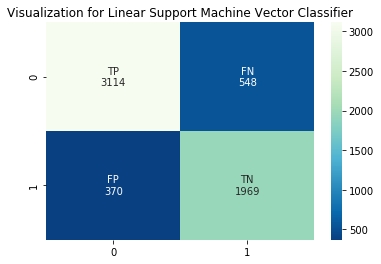

In [32]:
text = np.asarray([['TP', 'FN'], ['FP', 'TN']])
labels = (np.asarray(["{}\n{}".format(text,conf_matrix_clf) for text, conf_matrix_clf in zip(text.flatten(), conf_matrix_clf.flatten())])).reshape(2,2)
sns.heatmap(conf_matrix_clf, cmap="GnBu_r", annot=labels, fmt='')
plt.title("Visualization for Linear Support Machine Vector Classifier")
plt.show()

We are still going to look for the best hyperparameters to maximize performance.

In [95]:
modelSVC = LinearSVC()
parameter_space = {'penalty': ['l1','l2'],
                  'tol':[1,0.1,0.01,0.001,0.0001,0.000001],
                  'C':[x/100 for x in range(1,500,50)]}
gridSearchSVC = GridSearchCV(modelSVC, parameter_space, n_jobs=-1, cv=3)
gridSearchSVC.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.51, 1.01, 1.51, 2.01, 2.51, 3.01, 3.51,
                               4.01, 4.51],
                         'penalty': ['l1', 'l2'],
                         'tol': [1, 0.1, 0.01, 0.001, 0.0001, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [96]:
# Best parameter set
print('Best parameters found:\n', gridSearchSVC.best_params_)

Best parameters found:
 {'C': 1.01, 'penalty': 'l2', 'tol': 1}


In [97]:
# All results
means = gridSearchSVC.cv_results_['mean_test_score']
stds = gridSearchSVC.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridSearchSVC.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'tol': 1}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.1}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.01}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.001}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.0001}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'tol': 1e-06}
0.659 (+/-0.007) for {'C': 0.01, 'penalty': 'l2', 'tol': 1}
0.659 (+/-0.007) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.1}
0.659 (+/-0.007) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.01}
0.659 (+/-0.007) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.001}
0.659 (+/-0.007) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.0001}
0.659 (+/-0.007) for {'C': 0.01, 'penalty': 'l2', 'tol': 1e-06}
nan (+/-nan) for {'C': 0.51, 'penalty': 'l1', 'tol': 1}
nan (+/-nan) for {'C': 0.51, 'penalty': 'l1', 'tol': 0.1}
nan (+/-nan) for {'C': 0.51, 'penalty': 'l1', 'tol': 0.01}
nan (+/-nan) for {'C': 0.51, 'penalty': 'l1', 'tol': 0.001}
nan (+/-nan) for {'C': 0.51, 'penal

Let's take a closer look at the results of the best parameters

In [40]:
modelSVC = LinearSVC(C= 2.01,penalty='l2',tol= 1)
modelSVC.fit(x_train, y_train)
y_pred = modelSVC.predict(x_test)
conf_matrix_clf = confusion_matrix(y_test,y_pred)
conf_matrix_clf

array([[3033,  629],
       [ 275, 2064]], dtype=int64)

In [41]:
class_modelSVC = classification_report(y_test, y_pred)
print(class_modelSVC)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      3662
           1       0.77      0.88      0.82      2339

    accuracy                           0.85      6001
   macro avg       0.84      0.86      0.85      6001
weighted avg       0.86      0.85      0.85      6001



We will now calculate the average performance of our model with the best hyperparameters.

In [42]:
# Calcul real efficient of the model
def functionRealPerf(numberRun):
    listPrecision= []
    for i in range(numberRun):
        modelSVC = LinearSVC(C= 2.01,penalty='l2',tol= 1)
        modelSVC.fit(x_train, y_train)
        y_pred = modelSVC.predict(x_test)
        cr = classification_report(y_test,y_pred,digits=10,output_dict=True)
        listPrecision.append((cr['0']['precision']+cr['1']['precision'])/2)
    print("Max Precision : " + str(max(listPrecision)))
    print("Avg Precision : " + str(sum(listPrecision)/numberRun))
functionRealPerf(20)

Max Precision : 0.8493638142026139
Avg Precision : 0.8437684782984839


Plot to see the impact of variations of hyperparameters on the accuracy of the model.

In [98]:
# Convert to plot
penalty_convert =[]
for i in gridSearchSVC.cv_results_['params']:
    if(i['penalty'] == 'l1'):
        penalty_convert.append(1)
    if(i['penalty'] == 'l2'):
        penalty_convert.append(2)
C_convert = [ x['C'] for x in gridSearchSVC.cv_results_['params']]
tol_convert = [ x['tol'] for x in gridSearchSVC.cv_results_['params']]

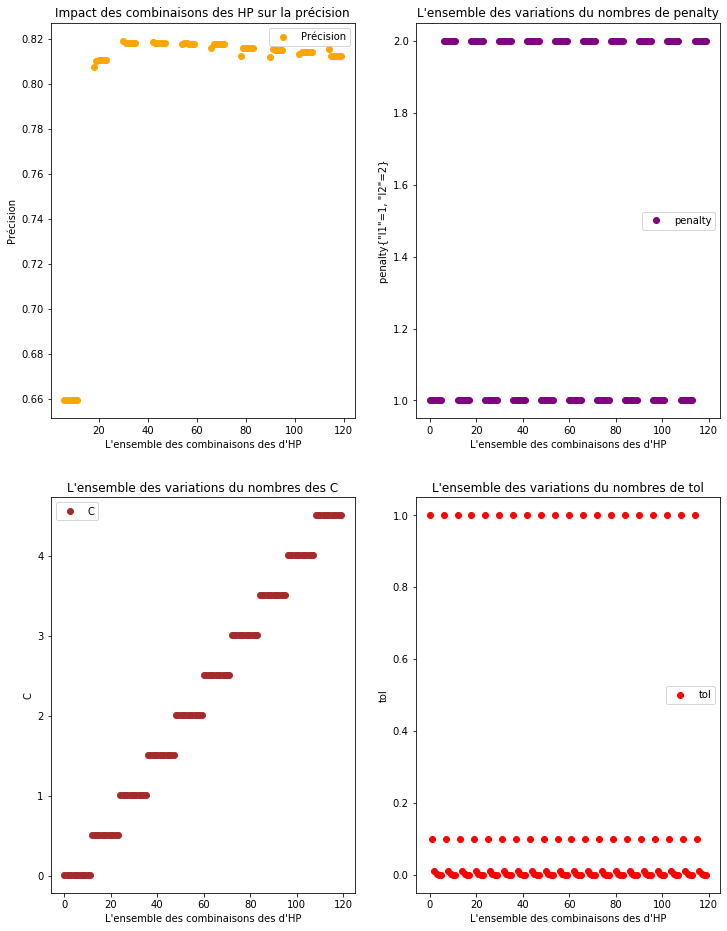

In [99]:
### Plot
y = [ i for i in range(0,len(means))]
fig, (axs) = plt.subplots(nrows=2, ncols=2, figsize=(12, 16))
# Précision 
axs[0,0].plot(y,means,"o",color="orange",label="Précision")
axs[0,0].legend()
axs[0,0].set_title('Impact des combinaisons des HP sur la précision')
axs[0,0].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='Précision')
# penalty
axs[0,1].plot(y,penalty_convert,"o",color="purple",label="penalty")
axs[0,1].set_title('L\'ensemble des variations du nombres de penalty')
axs[0,1].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='penalty{"l1"=1, "l2"=2}')
axs[0,1].legend()
# C
axs[1,0].plot(y,C_convert,"o",color="brown",label="C")
axs[1,0].set_title('L\'ensemble des variations du nombres des C')
axs[1,0].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='C')
axs[1,0].legend()
# tol
axs[1,1].plot(y,tol_convert,"o",color="red",label="tol")
axs[1,1].set_title('L\'ensemble des variations du nombres de tol')
axs[1,1].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='tol')
axs[1,1].legend()
plt.savefig('data/PlotLinearSupportVectorMachineClassifier.png')
plt.show()

# Decision Tree Classifier

Here we go for execution by default.

In [20]:
modelDTC = DecisionTreeClassifier()
modelDTC.fit(x_train, y_train) 
y_pred = modelDTC.predict(x_test)
conf_matrix_clf = confusion_matrix(y_test,y_pred)
conf_matrix_clf

array([[2974,  688],
       [ 179, 2160]], dtype=int64)

In [21]:
y_pred = modelDTC.predict(x_test)
modelDTC.score(x_test, y_pred)

1.0

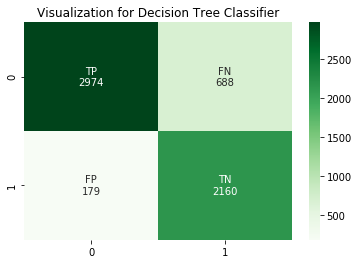

In [22]:
text = np.asarray([['TP', 'FN'], ['FP', 'TN']])
labels = (np.asarray(["{}\n{}".format(text,conf_matrix_clf) for text, conf_matrix_clf in zip(text.flatten(),conf_matrix_clf.flatten())])).reshape(2,2)
sns.heatmap(conf_matrix_clf, cmap="Greens", annot=labels, fmt='')
plt.title("Visualization for Decision Tree Classifier")
plt.show()


In [23]:
cr = classification_report(y_test,y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.94      0.81      0.87      3662
          1       0.76      0.92      0.83      2339

avg / total       0.87      0.86      0.86      6001



We will vary the criterion, max_features, min_samples_leaf and max_depth parameters to maximize the performance of our model.

In [81]:
modelDTC = DecisionTreeClassifier()
parameter_space = {'criterion': ['gini', 'entropy'],
                  'max_features':["auto", "sqrt", "log2"],
                  'min_samples_leaf':[ i for i in range(1,50,5)],
                  'max_depth' : [ i for i in range(1,50,5)]}
gridSearchDTC = GridSearchCV(modelDTC, parameter_space, n_jobs=-1, cv=3)
gridSearchDTC.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [82]:
# Best parameter set
print('Best parameters found:\n', gridSearchDTC.best_params_)

Best parameters found:
 {'criterion': 'entropy', 'max_depth': 46, 'max_features': 'auto', 'min_samples_leaf': 1}


In [83]:
# All results
means = gridSearchDTC.cv_results_['mean_test_score']
stds = gridSearchDTC.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridSearchDTC.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.614 (+/-0.011) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1}
0.609 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 6}
0.608 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 11}
0.608 (+/-0.000) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 16}
0.608 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 21}
0.608 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 26}
0.608 (+/-0.002) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 31}
0.613 (+/-0.012) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 36}
0.608 (+/-0.000) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 41}
0.609 (+/-0.003) for {'criterion': 'gin

Let's take a closer look at the results of the best parameters

In [53]:
modelDTC = DecisionTreeClassifier(criterion= 'gini', max_depth= 36, max_features= 'auto', min_samples_leaf= 1)
modelDTC.fit(x_train, y_train)
y_pred = modelDTC.predict(x_test)
conf_matrix_clf = confusion_matrix(y_test,y_pred)
conf_matrix_clf

array([[3399,  263],
       [1887,  452]], dtype=int64)

In [56]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.93      0.76      3662
           1       0.63      0.19      0.30      2339

    accuracy                           0.64      6001
   macro avg       0.64      0.56      0.53      6001
weighted avg       0.64      0.64      0.58      6001



We will now calculate the average performance of our model with the best hyperparameters.

In [57]:
# Calcul real efficient of the model
def functionRealPerf(numberRun):
    listPrecision= []
    for i in range(numberRun):
        modelDTC = DecisionTreeClassifier(criterion= 'gini', max_depth= 36, max_features= 'auto', min_samples_leaf= 1)
        modelDTC.fit(x_train, y_train)
        y_pred = modelDTC.predict(x_test)
        cr = classification_report(y_test,y_pred,digits=10,output_dict=True)
        listPrecision.append((cr['0']['precision']+cr['1']['precision'])/2)
    print("Max Precision : " + str(max(listPrecision)))
    print("Avg Precision : " + str(sum(listPrecision)/numberRun))
functionRealPerf(20)

Max Precision : 0.7017626489068813
Avg Precision : 0.6712162751195216


Plot to see the impact of variations of hyperparameters on the accuracy of the model.

In [84]:
# Convert to plot
criterion_convert =[]
for i in gridSearchDTC.cv_results_['params']:
    if(i['criterion'] == 'gini'):
        criterion_convert.append(1)
    if(i['criterion'] == 'entropy'):
        criterion_convert.append(2)
        
max_features_convert =[]
for i in gridSearchDTC.cv_results_['params']:
    if(i['max_features'] == 'auto'):
        max_features_convert.append(1)
    if(i['max_features'] == 'sqrt'):
        max_features_convert.append(2)
    if(i['max_features'] == 'log2'):
        max_features_convert.append(3)
        
max_depth_convert = [ x['max_depth'] for x in gridSearchDTC.cv_results_['params']]
min_samples_leaf_convert = [ x['min_samples_leaf'] for x in gridSearchDTC.cv_results_['params']]

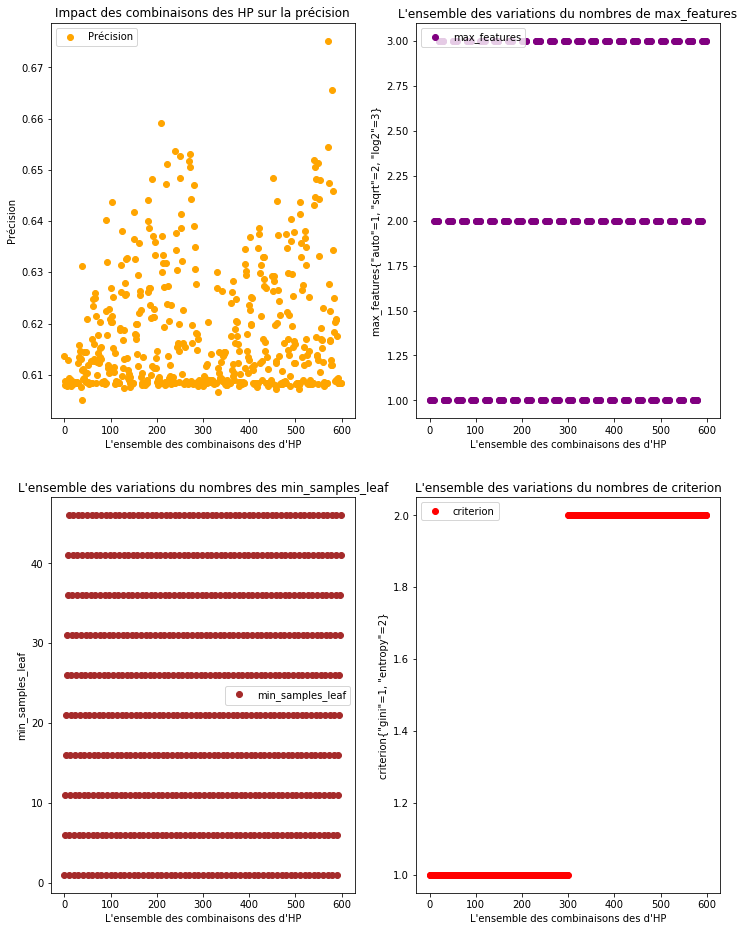

In [85]:
### Plot
y = [ i for i in range(0,len(means))]
fig, (axs) = plt.subplots(nrows=2, ncols=2, figsize=(12, 16))
# Précision 
axs[0,0].plot(y,means,"o",color="orange",label="Précision")
axs[0,0].legend()
axs[0,0].set_title('Impact des combinaisons des HP sur la précision')
axs[0,0].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='Précision')
# max_features
axs[0,1].plot(y,max_features_convert,"o",color="purple",label="max_features")
axs[0,1].set_title('L\'ensemble des variations du nombres de max_features')
axs[0,1].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='max_features{"auto"=1, "sqrt"=2, "log2"=3}')
axs[0,1].legend()
# min_samples_leaf
axs[1,0].plot(y,min_samples_leaf_convert,"o",color="brown",label="min_samples_leaf")
axs[1,0].set_title('L\'ensemble des variations du nombres des min_samples_leaf')
axs[1,0].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='min_samples_leaf')
axs[1,0].legend()
# criterion
axs[1,1].plot(y,criterion_convert,"o",color="red",label="criterion")
axs[1,1].set_title('L\'ensemble des variations du nombres de criterion')
axs[1,1].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='criterion{"gini"=1, "entropy"=2}')
axs[1,1].legend()
plt.savefig('data/PlotDecisionTreeClassifier.png')
plt.show()

# Random Forest Model

In [46]:
modelRFC = RandomForestClassifier()
modelRFC.fit(x_train,y_train)
y_pred = modelRFC.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[3359,  303],
       [ 293, 2046]], dtype=int64)

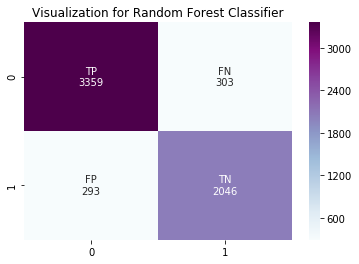

In [47]:
text = np.asarray([['TP', 'FN'], ['FP', 'TN']])
labels = (np.asarray(["{}\n{}".format(text,conf_matrix) for text, conf_matrix in zip(text.flatten(), conf_matrix.flatten())])).reshape(2,2)
sns.heatmap(conf_matrix, cmap="BuPu", annot=labels, fmt='')
plt.title("Visualization for Random Forest Classifier")
plt.show()

In [48]:
cr = classification_report(y_test,y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.92      0.92      0.92      3662
          1       0.87      0.87      0.87      2339

avg / total       0.90      0.90      0.90      6001



For the last time we are going to look for the most optimal hyperparameters to maximize the performance of our model.

First we're using RandomizedSearchCV 

In [30]:
#Finding the best estimator : the best hyperparameters

# Number of trees in random forest
n_estimators = [100, 300, 500, 800, 1200]
# Maximum number of levels in tree
max_depth = [5, 8, 15, 25, 30]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10] 

random_grid = dict(n_estimators = n_estimators, 
              max_depth = max_depth,  
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)

rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.8min finished


{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 30}

In [33]:
modelRFCRandom = RandomForestClassifier(min_samples_split= 5, min_samples_leaf= 1, n_estimators= 300, max_depth= 30)
modelRFCRandom.fit(x_train, y_train)
y_pred = modelRFCRandom.predict(x_test)
conf_matrix_clf = confusion_matrix(y_test,y_pred)
conf_matrix_clf

array([[3647,   15],
       [2092,  247]], dtype=int64)

In [34]:
crr = classification_report(y_test,y_pred)
print(crr)

             precision    recall  f1-score   support

          0       0.64      1.00      0.78      3662
          1       0.94      0.11      0.19      2339

avg / total       0.76      0.65      0.55      6001



We're not satisfied by the results so we're using GridSearchCV

In [28]:
modelRFC = RandomForestClassifier()
parameter_space = {'max_features':["auto", "sqrt", "log2"],
                  'min_samples_leaf':[ i for i in range(1,50,5)],
                  'n_estimators' : [ i for i in range(1,50,5)]}
gridSearchRFC = GridSearchCV(modelRFC, parameter_space, n_jobs=-1, cv=3)
gridSearchRFC.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [29]:
# Best parameter set
print('Best parameters found:\n', gridSearchRFC.best_params_)

Best parameters found:
 {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 41}


In [30]:
# All results
means = gridSearchRFC.cv_results_['mean_test_score']
stds = gridSearchRFC.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridSearchRFC.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.758 (+/-0.008) for {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 1}
0.834 (+/-0.017) for {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 6}
0.845 (+/-0.006) for {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 11}
0.855 (+/-0.014) for {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 16}
0.855 (+/-0.009) for {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 21}
0.860 (+/-0.009) for {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 26}
0.858 (+/-0.009) for {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 31}
0.863 (+/-0.010) for {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 36}
0.861 (+/-0.015) for {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 41}
0.861 (+/-0.010) for {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 46}
0.655 (+/-0.022) for {'max_features': 'auto', 'min_samples_leaf': 6, 'n_estimators': 1}
0.684 (+/-0.020) for {'m

Let's take a closer look at the results of the best parameters

In [66]:
modelRFC = RandomForestClassifier(max_features= 'log2', min_samples_leaf= 1, n_estimators= 41)
modelRFC.fit(x_train, y_train)
y_pred = modelRFC.predict(x_test)
conf_matrix_clf = confusion_matrix(y_test,y_pred)
conf_matrix_clf

array([[3472,  190],
       [ 253, 2086]], dtype=int64)

In [67]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3662
           1       0.92      0.89      0.90      2339

    accuracy                           0.93      6001
   macro avg       0.92      0.92      0.92      6001
weighted avg       0.93      0.93      0.93      6001



We will now calculate the average performance of our model with the best hyperparameters.

In [68]:
# Calcul real efficient of the model
def functionRealPerf(numberRun):
    listPrecision= []
    for i in range(numberRun):
        modelRFC = RandomForestClassifier(max_features= 'log2', min_samples_leaf= 1, n_estimators= 41)
        modelRFC.fit(x_train, y_train)
        y_pred = modelRFC.predict(x_test)
        cr = classification_report(y_test,y_pred,digits=10,output_dict=True)
        listPrecision.append((cr['0']['precision']+cr['1']['precision'])/2)
    print("Max Precision : " + str(max(listPrecision)))
    print("Avg Precision : " + str(sum(listPrecision)/numberRun))
functionRealPerf(20)

Max Precision : 0.9291090128309425
Avg Precision : 0.9248698052426377


Plot to see the impact of variations of hyperparameters on the accuracy of the model.

In [52]:
# Convert to plot
max_features_convert =[]
for i in gridSearchRFC.cv_results_['params']:
    if(i['max_features'] == 'auto'):
        max_features_convert.append(1)
    if(i['max_features'] == 'sqrt'):
        max_features_convert.append(2)
    if(i['max_features'] == 'log2'):
        max_features_convert.append(3)
min_simples_convert = [ x['min_samples_leaf'] for x in gridSearchRFC.cv_results_['params']]
n_estimators_convert = [ x['n_estimators'] for x in gridSearchRFC.cv_results_['params']]

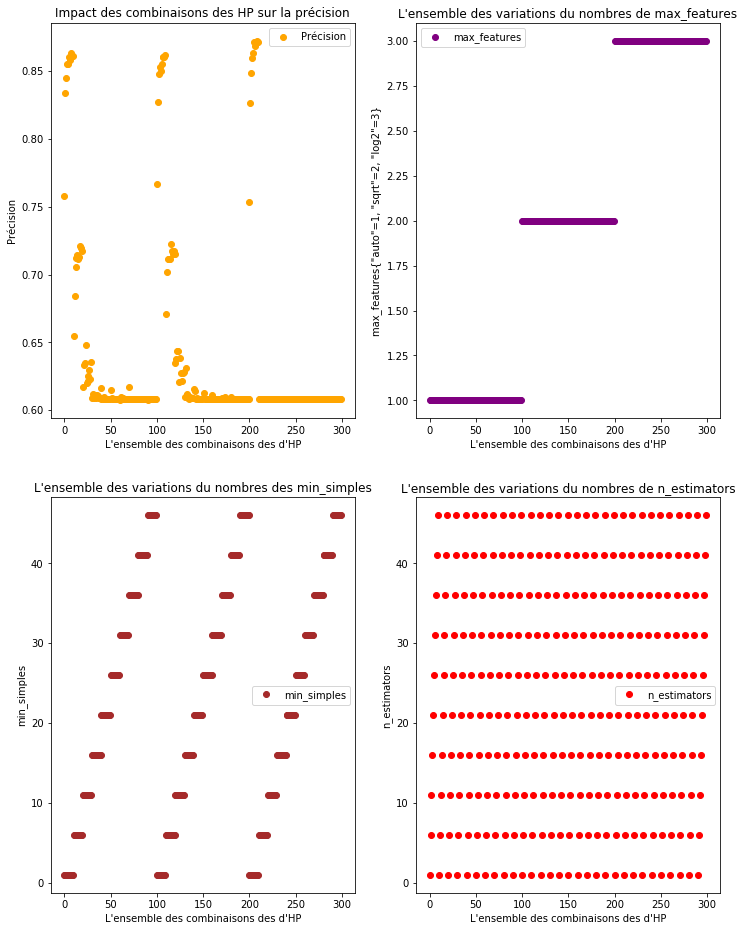

In [56]:
### Plot
y = [ i for i in range(0,len(means))]
fig, (axs) = plt.subplots(nrows=2, ncols=2, figsize=(12, 16))
# Précision 
axs[0,0].plot(y,means,"o",color="orange",label="Précision")
axs[0,0].legend()
axs[0,0].set_title('Impact des combinaisons des HP sur la précision')
axs[0,0].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='Précision')
# max_features
axs[0,1].plot(y,max_features_convert,"o",color="purple",label="max_features")
axs[0,1].set_title('L\'ensemble des variations du nombres de max_features')
axs[0,1].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='max_features{"auto"=1, "sqrt"=2, "log2"=3}')
axs[0,1].legend()
# min_simples
axs[1,0].plot(y,min_simples_convert,"o",color="brown",label="min_simples")
axs[1,0].set_title('L\'ensemble des variations du nombres des min_simples')
axs[1,0].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='min_simples')
axs[1,0].legend()
# n_estimators
axs[1,1].plot(y,n_estimators_convert,"o",color="red",label="n_estimators")
axs[1,1].set_title('L\'ensemble des variations du nombres de n_estimators')
axs[1,1].set(xlabel='L\'ensemble des combinaisons des d\'HP', ylabel='n_estimators')
axs[1,1].legend()
plt.savefig('data/PlotRandomForestClassifier.png')
plt.show()